This is a Neural-Network, that determines if the image (data) is a sign, or not. (2 labels)

Loading images...
  Finished no: Loaded 83 images.
  Finished yes: Loaded 288 images.

Total Dataset: 371 images loaded.
Feature vector size: 1024 (32x32x3 pixels)


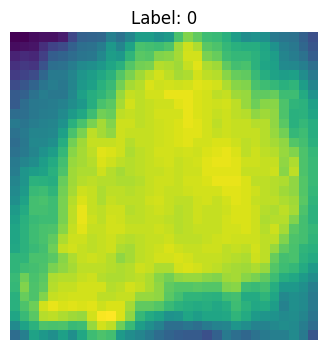


Training..

--- Evaluation ---
Model Accuracy: 97.33%
              precision    recall  f1-score   support

          no       1.00      0.91      0.95        23
         yes       0.96      1.00      0.98        52

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



In [98]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

#Dictionary - arrow types and labels
folders = {
    "no": 0,
    "yes": 1
}

# The parent folder in drive
base_folder = "data/is_sign/train"


# resize img
IMG_SIZE = (32, 32)


X_data = [] #  pixel values
y_data = [] #  labels

print("Loading images...")

for folder_name, label in folders.items():

    # File path in drive
    folder_path = os.path.join(base_folder, folder_name)

    # IF NO folder, SKIP
    if not os.path.exists(folder_path):
        print(f"Warning: Folder not found: {folder_path}")
        continue

    # Get a list of ALL files in this folder
    files = os.listdir(folder_path)

    count = 0
    for filename in files:
        # if PNG file
        if filename.lower().endswith(".png"):

            #  full path
            file_path = os.path.join(folder_path, filename)

            try:
                img = cv2.imread(file_path)

                if img is not None:
                    # Resize, Flatten, Normalize
                    img = cv2.resize(img[:,:,0], IMG_SIZE)
                    flat_img = img.flatten()
                    norm_img = flat_img / 255.0

                    X_data.append(norm_img)
                    y_data.append(label)
                    count += 1
                else:
                    print(f"Warning: Could not open {filename}")

            except Exception as e:
                print(f"Error reading {filename}: {e}")

    print(f"  Finished {folder_name}: Loaded {count} images.")

# Convert lists to np
X = np.array(X_data)
y = np.array(y_data)


if len(X) == 0:
    print("Error: No images found. Check folder structure and paths.")
    exit()

print(f"\nTotal Dataset: {len(X)} images loaded.")
print(f"Feature vector size: {X.shape[1]} (32x32x3 pixels)")

#plot an img
image_index = 0
flat_image = X[image_index]  #  1D array of flattened image

# Reshape it back to (Height, Width, Channels)
# use IMG_SIZE (32, 32) and 3 channels
restored_image = flat_image.reshape(32, 32)
plt.figure(figsize=(4, 4))
plt.imshow(restored_image)
plt.title(f"Label: {y[image_index]}")
plt.axis('off')
plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining..")

#  Multi-Layer Perceptron Classifier
# hidden_layer_sizes=(100, 50): Two layers of "neurons"

clf = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    max_iter=500,
    activation='relu',
    solver='adam',
    random_state=1
)

# Train the model
clf.fit(X_train, y_train)





print("\n--- Evaluation ---")
predictions = clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {acc*100:.2f}%")

# detailed report
target_names = list(folders.keys())
print(classification_report(y_test, predictions, target_names=target_names))

In [99]:
M1, M2, M3 = clf.coefs_
model_dir = "models/is_sign"
np.savetxt(f"{model_dir}/M1.csv", M1, delimiter=",")
np.savetxt(f"{model_dir}/M2.csv", M2, delimiter=",")
np.savetxt(f"{model_dir}/M3.csv", M3, delimiter=",")

In [100]:
b1, b2, b3 = clf.intercepts_
np.savetxt(f"{model_dir}/b1.csv", b1, delimiter=",")
np.savetxt(f"{model_dir}/b2.csv", b2, delimiter=",")
np.savetxt(f"{model_dir}/b3.csv", b3, delimiter=",")

In [101]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
def relu(x):
    return np.maximum(x, 0)

In [85]:
np.loadtxt(f"{model_dir}/M1.csv", delimiter = ',')

array([[-1.23702363e-02,  1.34412224e-07, -4.35701884e-02, ...,
        -1.03873203e-02, -4.73786313e-02, -6.15675072e-08],
       [-2.02291145e-02,  3.71658678e-10,  3.34719134e-02, ...,
        -1.05967358e-02,  6.01712473e-03,  2.97009719e-05],
       [ 3.39909891e-02, -7.36152159e-09,  3.60518690e-02, ...,
        -1.11516283e-02,  3.78540045e-02, -3.63952526e-06],
       ...,
       [ 2.12567369e-02, -1.48938279e-05, -8.83551624e-03, ...,
        -1.21751188e-02, -4.13417140e-02, -6.89590296e-08],
       [ 3.27733701e-02, -4.76971274e-10,  3.61547814e-02, ...,
        -1.05078439e-02,  2.41677471e-02,  7.88533830e-08],
       [-1.84150772e-02,  1.75042918e-06,  3.34791500e-02, ...,
        -1.14724247e-02,  2.33490874e-02,  8.39530630e-08]],
      shape=(3072, 100))

In [91]:
def homebrewMLP(X):
    state = relu(np.matmul(X, M1) + b1)
    state = relu(np.matmul(state, M2) + b2)
    state = np.matmul(state, M3) + b3
    return state[0] > 0

In [94]:
if homebrewMLP(X[10]):
    print("Sign!")